# Exploring Dandiset 001433: Breathing Rhythm and Place Dataset

> **IMPORTANT NOTE**: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. Always validate findings through independent analysis.

## Introduction

This notebook explores Dandiset 001433 (version 0.250507.2356) titled "Breathing rhythm and place dataset". This dataset contains behavioral and electrophysiological data from recordings of sniffing, video, and olfactory bulb (OB) electrophysiology in freely-behaving mice given no stimulus, reward, or task.

**Dandiset Link**: [https://dandiarchive.org/dandiset/001433/0.250507.2356](https://dandiarchive.org/dandiset/001433/0.250507.2356)

## Overview

In this notebook, we will:

1. Connect to the DANDI archive and retrieve information about the Dandiset
2. Load and examine an NWB file from the Dandiset
3. Explore the structure and metadata of the NWB file
4. Visualize and analyze the Local Field Potential (LFP) data
5. Visualize and analyze the sniffing data
6. Examine the relationship between LFP activity and breathing

## Required Packages

The following packages are required to run this notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import remfile
import pynwb
from dandi.dandiapi import DandiAPIClient
from scipy import signal
import seaborn as sns

sns.set_theme()  # Use seaborn styling for prettier plots

## Connecting to DANDI Archive and Getting Dandiset Information

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001433", "0.250507.2356")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata['description']}")
if 'measurementTechnique' in metadata:
    print(f"Measurement techniques: {', '.join([t['name'] for t in metadata['measurementTechnique']])}")

Dandiset name: Breathing rhythm and place dataset
Dandiset URL: https://dandiarchive.org/dandiset/001433/0.250507.2356
Dandiset description: These are behavioral and electrophysiological data from recordings of sniffing, video, and OB electrophysiology in freely-behaving mice given no stimulus, reward, or task. 1 1 R01 NS 123903


## Exploring Assets in the Dandiset

In [3]:
# List some assets in the Dandiset
assets = dandiset.get_assets()
print("First 5 assets:")
asset_list = []
for i, asset in enumerate(assets):
    if i < 5:
        print(f"- {asset.path} (ID: {asset.identifier})")
    asset_list.append({"path": asset.path, "id": asset.identifier})
print(f"\nTotal number of assets: {len(asset_list)}")

First 5 assets:
- sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb (ID: 63d19f03-2a35-48bd-a54f-9ab98ceb7be2)
- sub-4122/sub-4122_ses-20250507T152930_ecephys.nwb (ID: cce2f86c-2440-4358-8298-75cb2faa83f1)
- sub-4122/sub-4122_ses-20250507T152933_ecephys.nwb (ID: 154a5db2-9bad-48b9-bbe4-13376c315cbe)
- sub-4127/sub-4127_ses-20250507T152941_ecephys.nwb (ID: 8a2c176c-846d-432c-9c7b-cfd0cefa40cb)
- sub-4127/sub-4127_ses-20250507T152953_ecephys.nwb (ID: ba3b58b3-38ff-49d4-bc73-2105c87ecf49)

Total number of assets: 27


## Loading and Exploring an NWB File

For this analysis, we'll focus on a smaller NWB file from the dataset:
`sub-4127/sub-4127_ses-20250507T153020_ecephys.nwb`. This file contains LFP and sniff recordings from subject 4127.

In [4]:
# Asset ID of the NWB file we're going to explore
asset_id = "e392479c-8683-4424-a75b-34af512a17a2"
asset_url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"

# Load the NWB file
remote_file = remfile.File(asset_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Exploring NWB File Metadata

In [5]:
# Print general information about the NWB file
print(f"Session Description: {nwb.session_description}")
print(f"NWB File ID: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Experiment Description: {nwb.experiment_description}")
print(f"Institution: {nwb.institution}")
print(f"Lab: {nwb.lab}")
print(f"Keywords: {', '.join(nwb.keywords[:])}")

Session Description: LFP and sniff recording
NWB File ID: 4127_3
Session Start Time: 2025-05-07 15:30:20.524799-07:00
Experiment Description: LFP and sniff behavior recording
Institution: University of Oregon
Lab: Smear lab
Keywords: olfactory bulb, LFP, sniffing, mouse, neuroscience


## Subject Information

In [6]:
# Print information about the subject
subject = nwb.subject
print(f"Subject ID: {subject.subject_id}")
print(f"Species: {subject.species}")
print(f"Sex: {subject.sex}")
print(f"Age: {subject.age} {subject.age__reference}")
print(f"Description: {subject.description}")

Subject ID: 4127
Species: Mus musculus
Sex: M
Age: P90D birth
Description: Lab mouse used for sniffing + LFP experiment


## Exploring Acquisition Data

The NWB file contains two main acquisition datasets:
1. LFP signals from the olfactory bulb
2. Raw sniff signals (thermistor voltage)

In [7]:
# Print information about the acquisition data
print("Acquisition data types:")
for name, data in nwb.acquisition.items():
    if hasattr(data, 'data'):
        print(f"- {name}: shape {data.data.shape}, dtype {data.data.dtype}")
        print(f"  Description: {data.description}")
        print(f"  Unit: {data.unit}")
        print(f"  Rate: {data.rate} Hz")

Acquisition data types:
- LFP: shape (1006752, 16), dtype float64
  Description: LFP signal from olfactory bulb
  Unit: volts
  Rate: 1000.0 Hz
- SniffSignal: shape (1006752,), dtype float64
  Description: Raw sniff thermistor voltage
  Unit: volts
  Rate: 1000.0 Hz


## Exploring Electrodes

In [8]:
# Get electrode information as a dataframe
electrodes_df = nwb.electrodes.to_dataframe()
print(f"Number of electrodes: {len(electrodes_df)}")
electrodes_df

Number of electrodes: 16


,location,group,group_name,filtering
id,,,,
0,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x124...,LFPGroup,none
1,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x124...,LFPGroup,none
2,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x124...,LFPGroup,none
3,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x124...,LFPGroup,none
4,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x124...,LFPGroup,none
5,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x124...,LFPGroup,none
6,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x124...,LFPGroup,none
7,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x124...,LFPGroup,none
8,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x124...,LFPGroup,none


All electrodes are located in the olfactory bulb and part of the same electrode group.

## Exploring LFP Data

Let's visualize the LFP signals from the first 5 seconds of the recording for the first few channels:

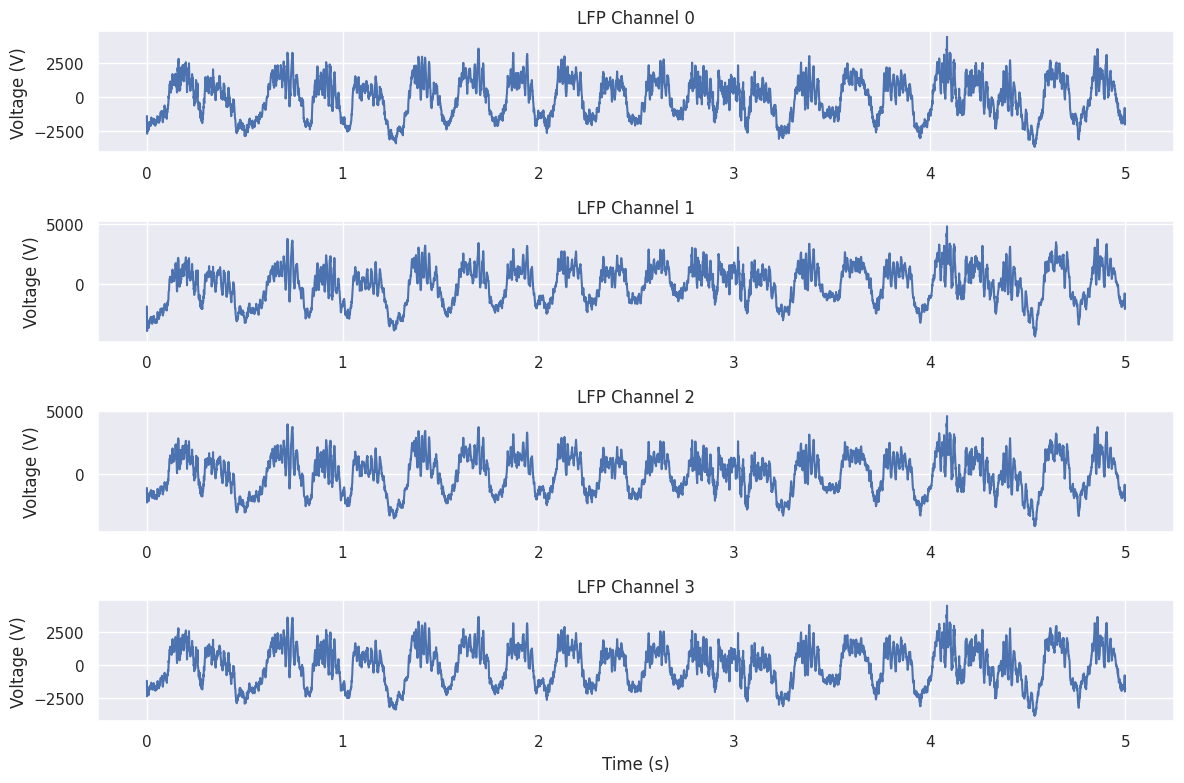

In [9]:
# Extract LFP data
lfp = nwb.acquisition["LFP"]
time_slice = slice(0, 5000)  # 5 seconds at 1000 Hz
lfp_subset = lfp.data[time_slice, :]
time_vector = np.arange(lfp_subset.shape[0]) / lfp.rate

# Plot LFP signals
plt.figure(figsize=(12, 8))
channels_to_plot = min(4, lfp_subset.shape[1])
for i in range(channels_to_plot):
    plt.subplot(channels_to_plot, 1, i+1)
    plt.plot(time_vector, lfp_subset[:, i])
    plt.title(f'LFP Channel {i}')
    plt.ylabel('Voltage (V)')
    if i == channels_to_plot-1:  # Only add xlabel to bottom plot
        plt.xlabel('Time (s)')
    plt.grid(True)
plt.tight_layout()

The LFP signals show clear rhythmic activity across all channels. The signals are highly synchronized between channels, suggesting they are recording from nearby regions in the olfactory bulb that are exhibiting coordinated neural activity.

## Frequency Analysis of LFP Signals

Let's analyze the frequency content of the LFP signals using power spectral density analysis:

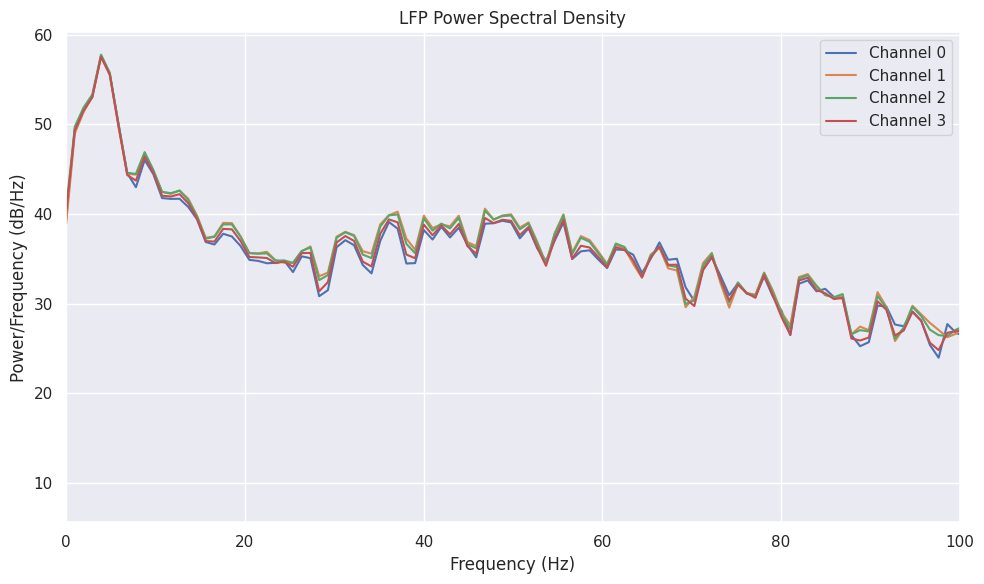

In [10]:
# Calculate power spectrum for the first few channels
plt.figure(figsize=(10, 6))
for i in range(min(4, lfp_subset.shape[1])):
    # Calculate the power spectrum
    f, Pxx = signal.welch(lfp_subset[:, i], fs=lfp.rate, nperseg=1024)
    # Convert to dB scale
    Pxx_db = 10 * np.log10(Pxx)
    plt.plot(f, Pxx_db, label=f'Channel {i}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('LFP Power Spectral Density')
plt.xlim(0, 100)  # Limit frequency display to 0-100 Hz
plt.legend()
plt.grid(True)
plt.tight_layout()

The power spectral density plot reveals:

1. A prominent peak around 5-7 Hz, corresponding to theta oscillations
2. A secondary peak around 15 Hz
3. Consistent frequency content across all channels

This pattern suggests coordinated oscillatory activity in the olfactory bulb, with strong theta rhythm that might be related to sniffing behavior.

## Time-Frequency Analysis of LFP Signal

Let's create a spectrogram to visualize how the frequency content changes over time:

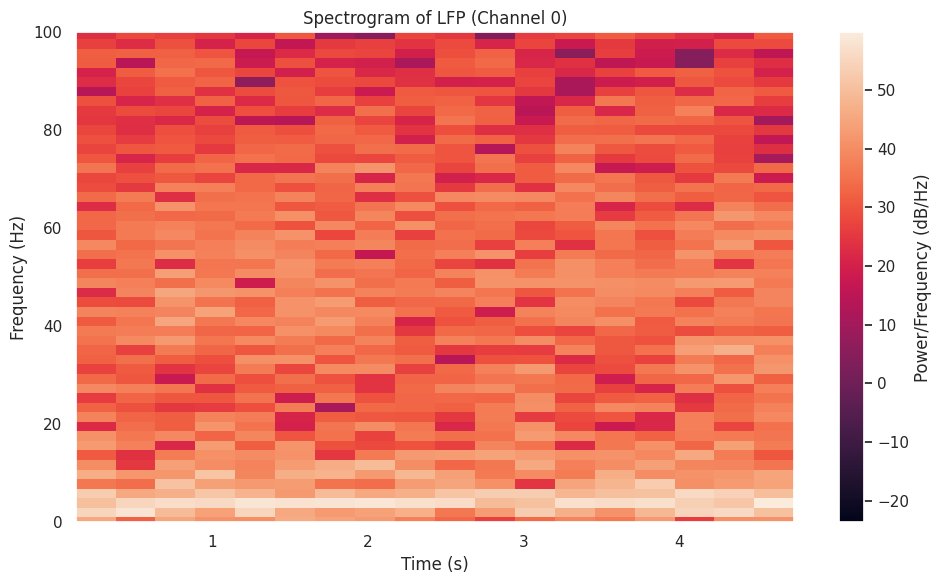

In [11]:
# Channel to analyze
channel = 0

# Compute and plot spectrogram for LFP data
plt.figure(figsize=(10, 6))
f, t, Sxx = signal.spectrogram(lfp_subset[:, channel], fs=lfp.rate, 
                              nperseg=512, noverlap=256,
                              scaling='density')

# Plot spectrogram
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='auto')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title(f'Spectrogram of LFP (Channel {channel})')
plt.ylim(0, 100)  # Limit frequency display to 0-100 Hz
plt.tight_layout()

The spectrogram shows the time-varying frequency content of the LFP signal. The most prominent power is in the low-frequency range (0-10 Hz), appearing as brighter regions. There are also oscillations visible in the mid-frequency ranges (40-70 Hz).

## Exploring Sniff Signal Data

Now, let's explore the sniffing data and its relationship with the LFP activity:

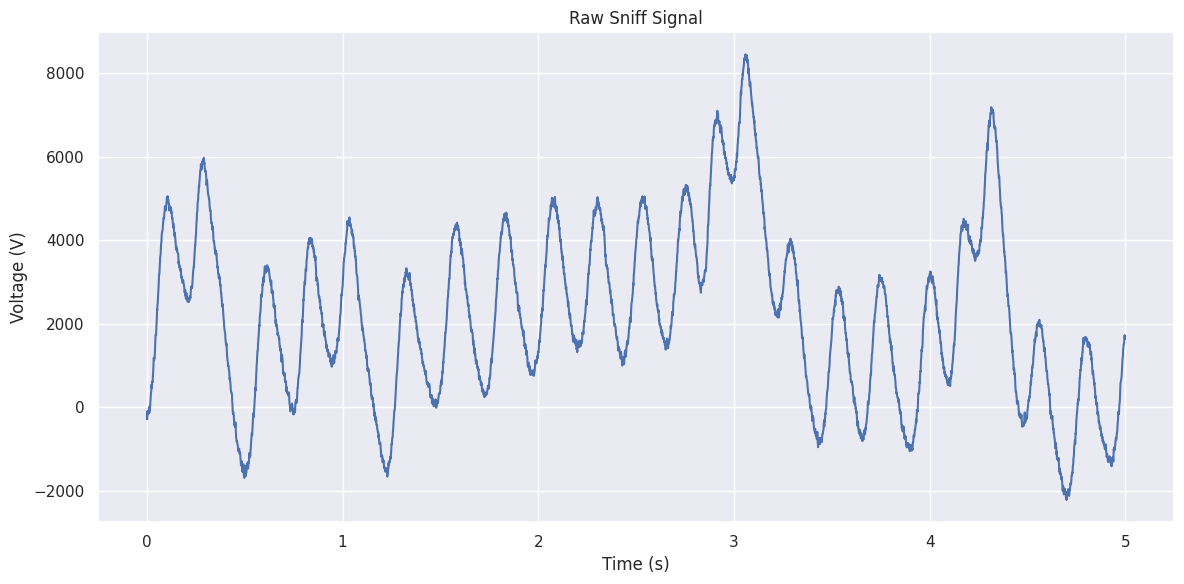

In [12]:
# Get sniff signal data
sniff = nwb.acquisition["SniffSignal"]
sniff_subset = sniff.data[time_slice]

# Plot sniff signal
plt.figure(figsize=(12, 6))
plt.plot(time_vector, sniff_subset)
plt.title('Raw Sniff Signal')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.grid(True)
plt.tight_layout()

The raw sniff signal shows clear oscillatory patterns representing the breathing cycle of the mouse. Each cycle typically consists of an inhalation phase (rising voltage) followed by an exhalation phase (falling voltage).

## Breathing Behavior Events

The dataset also includes processed data about inhalation and exhalation events:

In [13]:
# Get processing data for behavior
behavior = nwb.processing["behavior"]
print("Behavior data interfaces:")
for name in behavior.data_interfaces.keys():
    print(f"- {name}")

Behavior data interfaces:
- exhalation_time
- inhalation_time


Let's look at the inhalation and exhalation event timings:

In [14]:
# Get inhalation and exhalation data
inhalation = behavior.data_interfaces["inhalation_time"]
exhalation = behavior.data_interfaces["exhalation_time"]

print(f"Number of inhalation events: {len(inhalation.timestamps[:])}")
print(f"Number of exhalation events: {len(exhalation.timestamps[:])}")
print(f"Time range of inhalation events: {inhalation.timestamps[0]} to {inhalation.timestamps[-1]} seconds")
print(f"Time range of exhalation events: {exhalation.timestamps[0]} to {exhalation.timestamps[-1]} seconds")

# Let's look at the first few events
print("\nFirst 10 inhalation times (seconds):")
print(inhalation.timestamps[:10])
print("\nFirst 10 exhalation times (seconds):")
print(exhalation.timestamps[:10])

Number of inhalation events: 3456
Number of exhalation events: 3456
Time range of inhalation events: 108.0 to 1005315.0 seconds
Time range of exhalation events: 214.0 to 0.0 seconds

First 10 inhalation times (seconds):
[ 108.  291.  618.  839. 1033. 1329. 1587. 1835. 2073. 2306.]

First 10 exhalation times (seconds):
[ 214.  503.  753.  946. 1228. 1484. 1731. 1976. 2203. 2435.]


## Examining Sniff Signal with Exhalation Events

Let's visualize a section of the sniff signal with exhalation events marked:

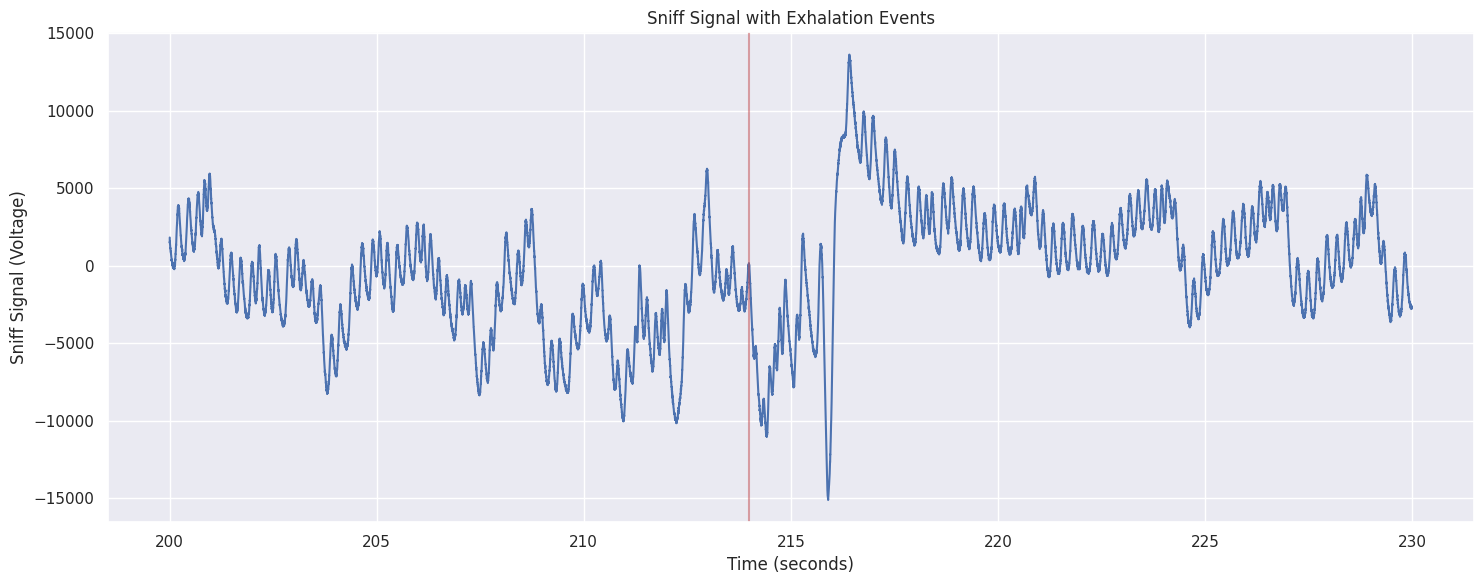

In [15]:
# Get a 30-second window of the sniff signal
start_time = 200  # Start at 200 seconds
window_size = 30  # 30 seconds
end_time = start_time + window_size

# Get the sniff signal data for this window
start_idx = int(start_time * sniff.rate)
end_idx = int(end_time * sniff.rate)
sniff_data = sniff.data[start_idx:end_idx]
time_vector_window = np.arange(len(sniff_data)) / sniff.rate + start_time

# Find exhalation events in this window
exh_times = exhalation.timestamps[:]
exh_in_window = exh_times[(exh_times >= start_time) & (exh_times < end_time)]

# Plot the sniff signal with exhalation marks
plt.figure(figsize=(15, 6))
plt.plot(time_vector_window, sniff_data, 'b-')

# Add markers for exhalation events
for t in exh_in_window:
    plt.axvline(x=t, color='r', linestyle='-', alpha=0.5)

plt.title('Sniff Signal with Exhalation Events')
plt.xlabel('Time (seconds)')
plt.ylabel('Sniff Signal (Voltage)')
plt.grid(True)
plt.tight_layout()

The plot shows the sniff signal with vertical red lines marking the detected exhalation events. The exhalation events appear to coincide with transitions in the sniff signal, typically occurring during a rising phase of the signal.

## Relationship Between LFP and Breathing

Let's examine how the LFP activity relates to breathing events by analyzing the average LFP activity around exhalation events:

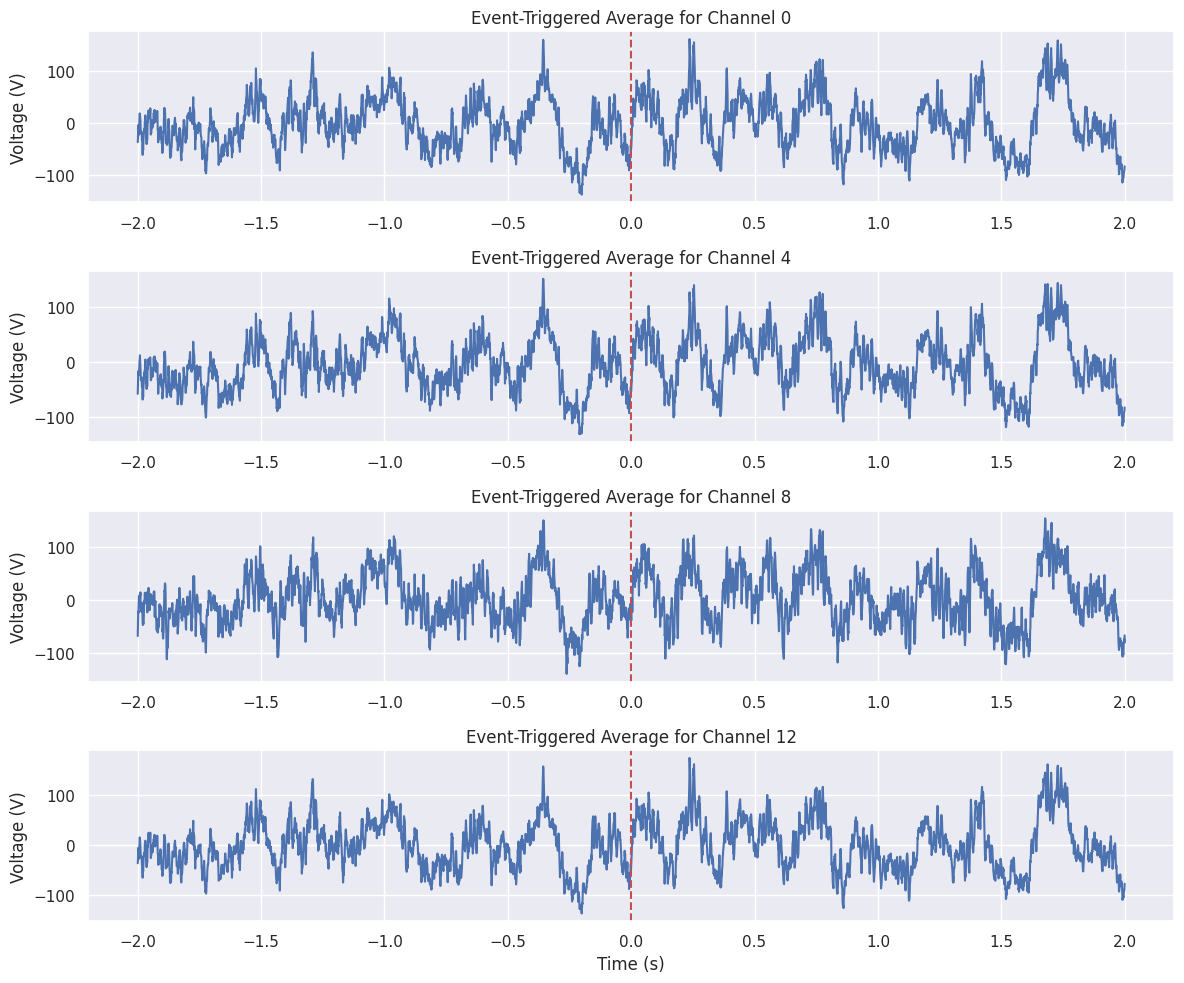

In [16]:
# Parameters for event-triggered analysis
fs = lfp.rate  # Sampling rate
pre_window = 2.0  # seconds before event
post_window = 2.0  # seconds after event
pre_samples = int(pre_window * fs)
post_samples = int(post_window * fs)

# Select events to analyze (limit to 50 events for efficiency)
n_events = min(50, len(exh_times))
selected_events = exh_times[:n_events]

# Choose a few electrode channels to analyze
channels_to_analyze = [0, 4, 8, 12]
num_channels = len(channels_to_analyze)

# Initialize array to hold event-triggered data
# Shape: [n_events, n_channels, n_timepoints]
event_triggered_data = np.zeros((n_events, num_channels, pre_samples + post_samples))

# Extract LFP segments around each event
for i, event_time in enumerate(selected_events):
    # Convert event time to sample index
    event_sample = int(event_time * fs)
    
    # Define extraction range
    start_idx = max(0, event_sample - pre_samples)
    end_idx = min(lfp.data.shape[0], event_sample + post_samples)
    
    # Check if we have enough data before and after
    if start_idx >= 0 and end_idx <= lfp.data.shape[0] and (end_idx - start_idx) == (pre_samples + post_samples):
        for j, chan in enumerate(channels_to_analyze):
            event_triggered_data[i, j, :] = lfp.data[start_idx:end_idx, chan]

# Create time vector for plotting
time_vector_event = np.linspace(-pre_window, post_window, pre_samples + post_samples)

# Calculate event-triggered average for each channel
event_triggered_avg = np.mean(event_triggered_data, axis=0)

# Plot event-triggered averages
plt.figure(figsize=(12, 10))
for i, chan in enumerate(channels_to_analyze):
    plt.subplot(num_channels, 1, i+1)
    plt.plot(time_vector_event, event_triggered_avg[i, :])
    plt.axvline(x=0, color='r', linestyle='--')  # Mark event time
    plt.title(f'Event-Triggered Average for Channel {chan}')
    plt.ylabel('Voltage (V)')
    if i == num_channels - 1:  # Only add xlabel to bottom subplot
        plt.xlabel('Time (s)')
    plt.grid(True)
plt.tight_layout()

The event-triggered average shows the average LFP activity around exhalation events (marked by the red dashed line at time 0). Key observations:

1. There's a consistent pattern across all channels, showing a negative deflection before exhalation, followed by a transition to more positive values after exhalation.
2. After exhalation, the LFP shows rhythmic oscillatory activity.
3. This consistent pattern across channels suggests a robust relationship between neural activity in the olfactory bulb and breathing.

## Time-Frequency Analysis Around Breathing Events

Let's analyze how the frequency content of LFP signals changes around exhalation events:

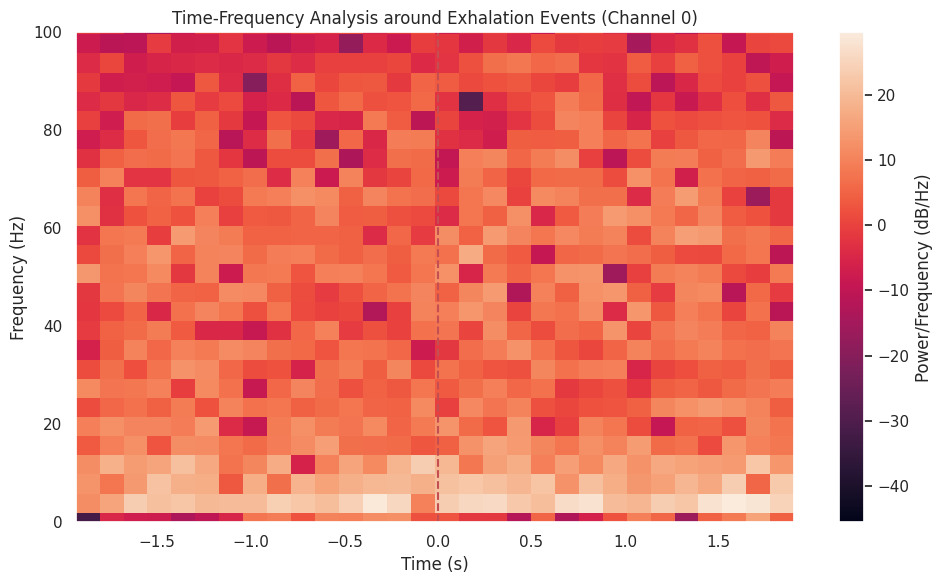

In [17]:
# Get the event-triggered average for channel 0
channel = 0
chan_idx = channels_to_analyze.index(channel) if channel in channels_to_analyze else 0
avg_lfp = event_triggered_avg[chan_idx, :]

# Calculate time-frequency representation using spectrogram
f, t, Sxx = signal.spectrogram(avg_lfp, fs=fs, nperseg=256, noverlap=128, scaling='density')

# Plot time-frequency representation
plt.figure(figsize=(10, 6))
plt.pcolormesh(t - pre_window, f, 10 * np.log10(Sxx), shading='auto')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.axvline(x=0, color='r', linestyle='--')  # Mark event time
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title(f'Time-Frequency Analysis around Exhalation Events (Channel {channel})')
plt.ylim(0, 100)  # Limit frequency display to 0-100 Hz
plt.tight_layout()

The time-frequency analysis shows how different frequency bands of LFP activity are modulated around exhalation events. The most prominent activity is in the low-frequency range (0-10 Hz), with increased power following exhalation. This suggests that breathing, particularly exhalation, has a rhythmic entrainment effect on neural oscillations.

## Summary and Neurosift Link

In this notebook, we've explored Dandiset 001433, which contains LFP recordings from the olfactory bulb and sniffing data from freely-behaving mice. Key findings include:

1. The LFP signals show strong rhythmic activity, with prominent power in the theta frequency range (5-7 Hz)
2. There's a clear relationship between breathing events (particularly exhalations) and LFP activity
3. LFP activity across different channels is highly synchronized, suggesting coordinated neural activity in the recorded region

You can explore this NWB file further using Neurosift:

[Neurosift Link](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/e392479c-8683-4424-a75b-34af512a17a2/download/&dandisetId=001433&dandisetVersion=0.250507.2356)

## Future Directions

Future analyses of this dataset could include:

1. More detailed examination of phase relationships between breathing cycles and neural oscillations
2. Correlation analysis between LFP power in specific frequency bands and breathing rate
3. Comparison of neural activity patterns across different recording sessions and subjects
4. Analysis of location-dependent LFP signals and their relationship with breathing
5. Machine learning approaches to predict breathing events from LFP signals